# Keras Regression

In [1]:
#输出多个output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
#Open hinterland
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use("ggplot")

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Data Visualization

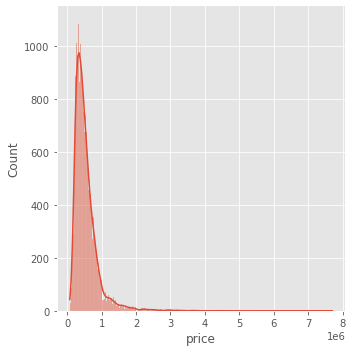

In [8]:
sns.displot(df['price'], kde=True);

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

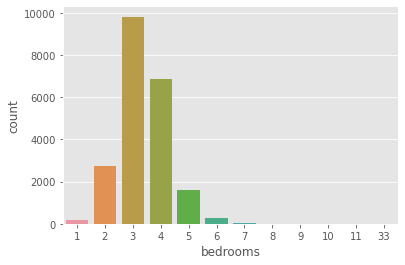

In [9]:
sns.countplot(data=df, x="bedrooms")

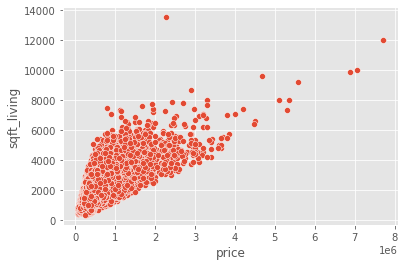

In [10]:
sns.scatterplot(data=df, x="price", y="sqft_living");

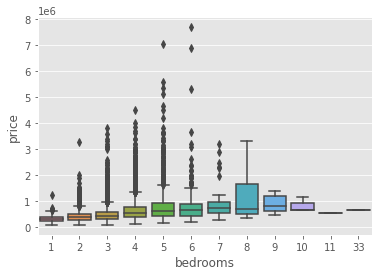

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df);

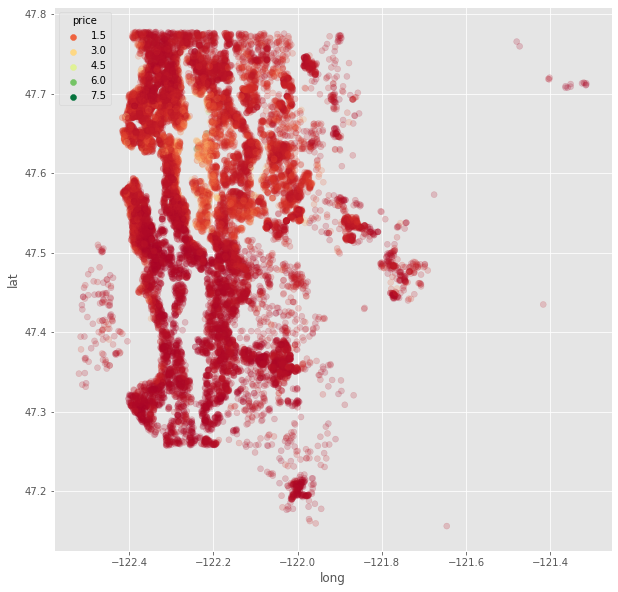

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2);

In [13]:
df['date'] = pd.to_datetime(df['date'])
df["month"] = df["date"].apply(lambda date: date.month)
df["year"] = df["date"].apply(lambda date: date.year)

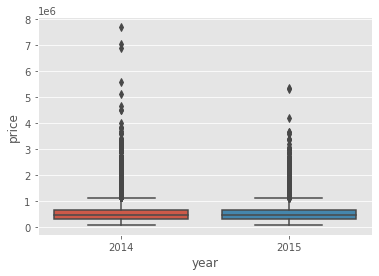

In [14]:
sns.boxplot(x='year',y='price',data=df);

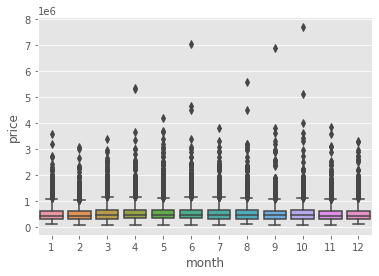

In [15]:
sns.boxplot(x='month',y='price',data=df);

<AxesSubplot:xlabel='month'>

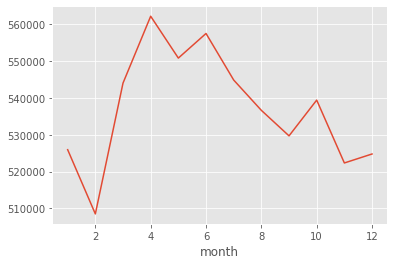

In [16]:
df.groupby("month").mean()["price"].plot()

### Drop some features

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [18]:
df.drop(["id","date","zipcode"], axis=1, inplace=True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [20]:
df.shape

(21597, 20)

### Data Preprocessing
#### Split dataset

In [21]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape
X_test.shape

(15117, 19)

(6480, 19)

#### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training a Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam #Adaptive Gradient Descent method

In [28]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=150)

Train on 15117 samples, validate on 6480 samples
Epoch 1/150
15117/15117 [==============================] - 2s 103us/sample - loss: 430246694076.1093 - val_loss: 418956124706.1334
Epoch 2/150
15117/15117 [==============================] - 0s 26us/sample - loss: 429746097279.4157 - val_loss: 417218695926.5185
Epoch 3/150
15117/15117 [==============================] - 0s 25us/sample - loss: 422692674120.3107 - val_loss: 400955767618.3704
Epoch 4/150
15117/15117 [==============================] - 0s 25us/sample - loss: 386092807999.7587 - val_loss: 337467319424.9481
Epoch 5/150
15117/15117 [==============================] - 0s 25us/sample - loss: 287755785096.7128 - val_loss: 210413429686.6765
Epoch 6/150
15117/15117 [==============================] - 0s 25us/sample - loss: 159629590808.1656 - val_loss: 110667321880.0198
Epoch 7/150
15117/15117 [==============================] - 0s 25us/sample - loss: 103336649316.8962 - val_loss: 94988753730.3704
Epoch 8/150
15117/15117 [================

15117/15117 [==============================] - 0s 29us/sample - loss: 41929465347.5563 - val_loss: 40792048637.4716
Epoch 65/150
15117/15117 [==============================] - 0s 28us/sample - loss: 41695530570.4105 - val_loss: 40517740225.4222
Epoch 66/150
15117/15117 [==============================] - 0s 31us/sample - loss: 41420690018.3222 - val_loss: 40240865188.9778
Epoch 67/150
15117/15117 [==============================] - 0s 28us/sample - loss: 41191278951.4195 - val_loss: 39994013898.2716
Epoch 68/150
15117/15117 [==============================] - 0s 29us/sample - loss: 40905335867.2710 - val_loss: 39694874634.1136
Epoch 69/150
15117/15117 [==============================] - 0s 28us/sample - loss: 40632400524.9296 - val_loss: 39391498644.5432
Epoch 70/150
15117/15117 [==============================] - 0s 27us/sample - loss: 40341428045.3063 - val_loss: 39129375271.1901
Epoch 71/150
15117/15117 [==============================] - 0s 27us/sample - loss: 40075229898.9778 - val_loss

15117/15117 [==============================] - 1s 33us/sample - loss: 33902500628.8803 - val_loss: 32721226380.3259
Epoch 128/150
15117/15117 [==============================] - 0s 31us/sample - loss: 33850238054.7590 - val_loss: 32579556839.9802
Epoch 129/150
15117/15117 [==============================] - 0s 31us/sample - loss: 33810591601.2076 - val_loss: 32556734201.0469
Epoch 130/150
15117/15117 [==============================] - 1s 35us/sample - loss: 33793146058.7408 - val_loss: 32467118509.8272
Epoch 131/150
15117/15117 [==============================] - 0s 31us/sample - loss: 33772611697.3939 - val_loss: 32413192697.6790
Epoch 132/150
15117/15117 [==============================] - 1s 35us/sample - loss: 33699205370.7672 - val_loss: 32407300717.9852
Epoch 133/150
15117/15117 [==============================] - 1s 34us/sample - loss: 33655589908.1183 - val_loss: 32323427932.2864
Epoch 134/150
15117/15117 [==============================] - 0s 33us/sample - loss: 33681727733.4836 - v

In [30]:
losses = pd.DataFrame(model.history.history)

**Learning Curve:**

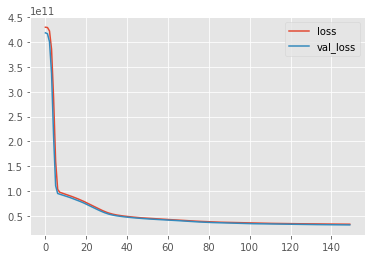

In [32]:
losses.plot();

## Model Evaluation

In [180]:
pred = model.predict(X_test)

In [181]:
from sklearn.metrics import mean_squared_error, explained_variance_score

In [182]:
mean_squared_error(y_test, pred)

31505942626.403717

In [184]:
explained_variance_score(y_test,pred)

0.7624301246669882

**76% Variance of y_test is explained by the model, so it's great**

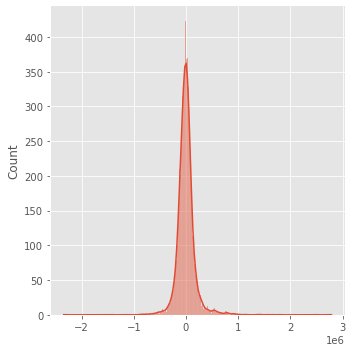

In [193]:
Res = y_test - pred.flatten()
sns.displot(Res, kde=True);